## Homework Linear Regression

- The dataset you are working is Boston Housing Price

- The Boston_Housing_Prices dataset is a famous dataset usually used for learning or benchmarking regression techniques. This dataset contains 14 variables, one of which (MEDV, median value of home) we'll use as the target. 

- For this assignment, your task is to:

1- Read in the dataset using sklearn's load_boston() function (found in sklearn.datasets) 

2- Perform some basic exploratory data analysis to get a feel for the data. Graph some stuff! 

3- Create a correlation heatmap to check to see how highly correlated our predictor variables (features) are (Remember, if our predictors are highly correlated, this is bad.)

4- Train the model based on the train set. Use 75 percent of the data for train part. Use 25 percent of the data for test part.

Hint: `from sklearn.model_selection import train_test_split`

Hint: `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)`

5 -Make predictions on your test set (X_test) and see how well it compares to the actual targets (y_test) from the test set.

6- Compute, Mean-Square-Error (MSE) and R Squared score of your Model 

Hint: `from sklearn.metrics import r2_score`

Hint: `from sklearn.metrics import mean_squared_error`

In [10]:
# import the load_boston() function from sklearn.datasets
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

boston = load_boston()

# print(boston.data)
# print(boston.data.shape)

bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target # our target value is price 

print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


## Data Analysis

In [24]:
bos.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [23]:
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm') # let's color code correlation 

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
ZN,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
PTRATIO,-0.391679,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787


### Columns with High Correlation to Target Values

- RM (Average Num of Rooms)
- ZN(land zones for lots over 25,000 sq.ft.) 
- B (blacks in the neighborhood) 
- DIS(proximity to employment centres)
- We see that "TAX" and "RAD" are highist correlated columns in this dataset with a corr: .91

### Check for Missing Values

In [27]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [31]:
bos['PRICE'].mean()

22.532806324110677

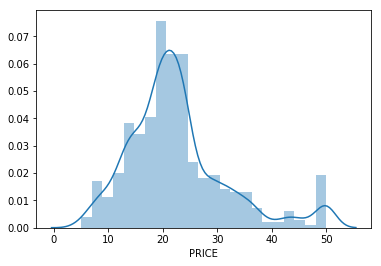

In [32]:
sns.distplot(bos['PRICE'])

## Rearrange Data

In [33]:
# To make our data frame more organized, we prefer to place the dependent variable in the beginning of the df
# Since each problem is different, that must be done manually
# We can display all possible features and then choose the desired order
bos.columns.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'], dtype=object)

In [34]:
cols = ['PRICE', 'ZN', 'B', 'DIS','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD',
       'TAX', 'PTRATIO', 'LSTAT']

In [35]:
# To implement the reordering, we will create a new df, which is equal to the old one but with the new order of features
data_preprocessed = bos[cols]
data_preprocessed.head()

,PRICE,ZN,B,DIS,INDUS,CHAS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT
0,24.0,18.0,396.90,4.0900,2.31,0.0,0.538,6.575,65.2,1.0,296.0,15.3,4.98
1,21.6,0.0,396.90,4.9671,7.07,0.0,0.469,6.421,78.9,2.0,242.0,17.8,9.14
2,34.7,0.0,392.83,4.9671,7.07,0.0,0.469,7.185,61.1,2.0,242.0,17.8,4.03
3,33.4,0.0,394.63,6.0622,2.18,0.0,0.458,6.998,45.8,3.0,222.0,18.7,2.94
4,36.2,0.0,396.90,6.0622,2.18,0.0,0.458,7.147,54.2,3.0,222.0,18.7,5.33


# Linear Regression Model

## Declare the Inputs and Target Variables

In [37]:
target = bos['PRICE']
inputs = bos.drop(['PRICE'],axis=1)

## Apply data normalization (Scaling) to improve the prediction result

- Use StandardScaler and then train your Linear Regression Model. Comapre the R Square score with previous one you got

- Use MinMaxScaler and then train your Linear Regression Model. Comapre the R Square score with previous one you got

- Watch this video: https://www.youtube.com/watch?v=YKP31T5LIXQ

## Scale The Data

In [38]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object 
scaler = StandardScaler()

# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [39]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [ ]:
# Import module for splitting data
from sklearn.model_selection import train_test_split

x_train, y_train, x_test, y_test


### Create The Regression

### Finding the Weights and Bias

## Testing